# Full code here: https://github.com/maciejors/neural-networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
# Default plotting settings for matplotlib
plt.rc('figure', figsize=(8, 6), dpi=100)

# Datasets

## `MNIST`

In [3]:
mnist = pd.read_csv('data/mnist/mnist_test.csv')

In [4]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [5]:
mnist['label'].value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: label, dtype: int64

In [6]:
mnist_data = mnist.drop(columns=['label']).to_numpy().reshape((-1, 784))
mnist_labels = mnist['label'].to_numpy().reshape((-1, 1))

In [7]:
dim_reducer_mnist = TSNE(n_components=2)
mnist_2d = dim_reducer_mnist.fit_transform(mnist_data)

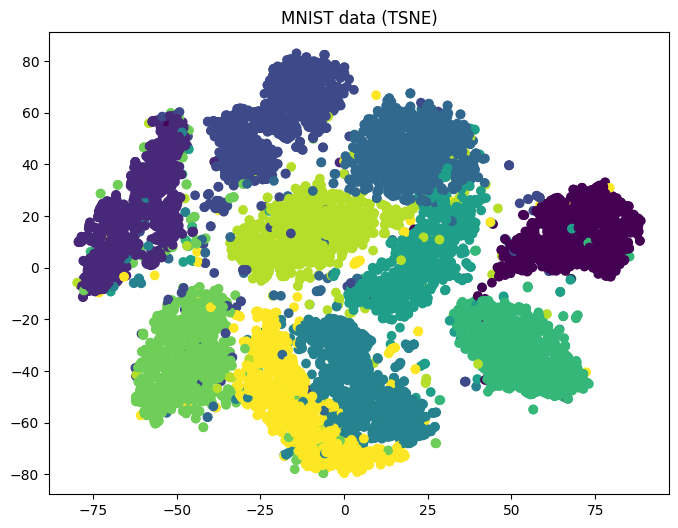

In [8]:
plt.scatter(mnist_2d[:, 0], mnist_2d[:, 1], c=mnist_labels)
plt.title('MNIST data (TSNE)')
plt.show()

## smartphones

In [9]:
smartphones_data = pd.read_csv('data/smartphones/train/X_train.txt', delim_whitespace=True, header=None).to_numpy().reshape((-1, 561))
smartphones_labels = pd.read_csv('data/smartphones/train/y_train.txt', delim_whitespace=True, header=None).to_numpy().reshape((-1, 1))

In [10]:
smartphones_data.shape

(7352, 561)

In [11]:
np.unique(smartphones_labels, return_counts=True)

(array([1, 2, 3, 4, 5, 6]), array([1226, 1073,  986, 1286, 1374, 1407]))

In [12]:
dim_reducer_smartphones = TSNE(n_components=2)
smartphones_2d = dim_reducer_smartphones.fit_transform(smartphones_data)

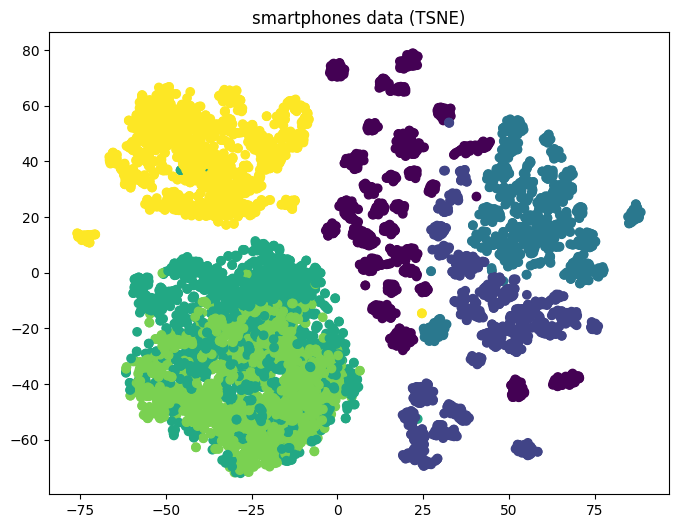

In [13]:
plt.scatter(smartphones_2d[:, 0], smartphones_2d[:, 1], c=smartphones_labels)
plt.title('smartphones data (TSNE)')
plt.show()

# Kohonen network testing

In [14]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

from kohonenn.network import KohonenNetwork
from kohonenn.neighbourhood_func import GaussFunction, MexicanHat
from kohonenn.lr_decay_functions import alpha_func

In [15]:
def print_scores(true_labels: np.ndarray, pred_labels: np.ndarray):
    _true_labels = np.squeeze(true_labels)
    _pred_labels = np.squeeze(pred_labels)

    ar = adjusted_rand_score(_true_labels, _pred_labels)
    ami = adjusted_mutual_info_score(_true_labels, _pred_labels)

    print(f'Adjusted Rand score: {ar:.3f}')
    print(f'Adjusted Mutual Information score: {ami:.3f}')

## `MNIST`

### Square topology & gaussian neighbourhood function

In [16]:
koh_mnist_sq_gauss = KohonenNetwork(
    input_size=784, output_dim=(5, 2), hex_topology=False,
)

In [17]:
koh_mnist_sq_gauss.train(
    data=mnist_data, epochs=20, init_lr=0.4, lr_decay_func=alpha_func, 
    neighbourhood_func=GaussFunction(nbhood_width_factor=0.3),
    verbosity_period=1, random_state=38,
)

Epoch 1 done!
   - mean abs delta = 9.963805177832278
   - max abs delta = 105.7207391364186
Epoch 2 done!
   - mean abs delta = 5.441803017269399
   - max abs delta = 92.29341663966788
Epoch 3 done!
   - mean abs delta = 3.1366176956273066
   - max abs delta = 87.7922135953559
Epoch 4 done!
   - mean abs delta = 1.956972912610795
   - max abs delta = 83.51053681395416
Epoch 5 done!
   - mean abs delta = 1.3404917002849885
   - max abs delta = 79.43767987328332
Epoch 6 done!
   - mean abs delta = 1.0403987475289158
   - max abs delta = 75.56345850953522
Epoch 7 done!
   - mean abs delta = 0.8928477608384313
   - max abs delta = 71.87818515130877
Epoch 8 done!
   - mean abs delta = 0.819377930596475
   - max abs delta = 68.37264469563522
Epoch 9 done!
   - mean abs delta = 0.7690907494349207
   - max abs delta = 65.03807146542088
Epoch 10 done!
   - mean abs delta = 0.7303186135187361
   - max abs delta = 61.86612729068862
Epoch 11 done!
   - mean abs delta = 0.692922056904224
   - max 

In [18]:
pred = koh_mnist_sq_gauss.predict(mnist_data)
print_scores(mnist_labels, pred)

Adjusted Rand score: 0.351
Adjusted Mutual Information score: 0.472


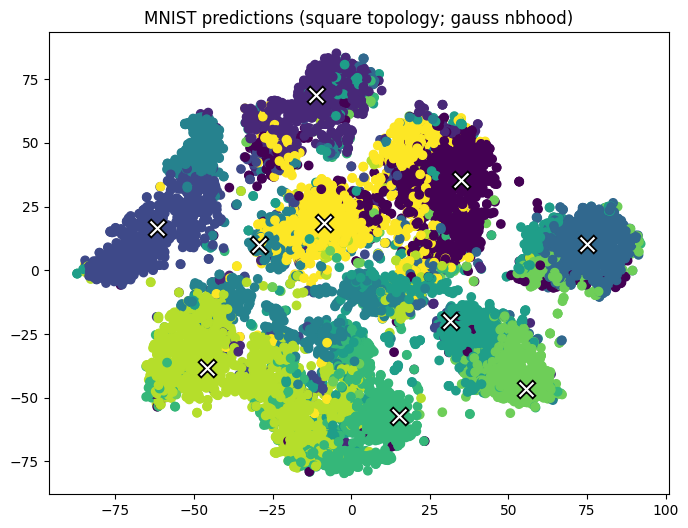

In [19]:
fig = plt.figure()
koh_mnist_sq_gauss.visualise_centroids(data=mnist_data, fig=fig)
plt.title('MNIST predictions (square topology; gauss nbhood)')
plt.show()

### Hex topology & gaussian neighbourhood function

In [20]:
koh_mnist_hex_gauss = KohonenNetwork(
    input_size=784, output_dim=(5, 2), hex_topology=True,
)

In [21]:
koh_mnist_hex_gauss.train(
    data=mnist_data, epochs=20, init_lr=0.4, lr_decay_func=alpha_func, 
    neighbourhood_func=GaussFunction(nbhood_width_factor=0.3),
    verbosity_period=1, random_state=19,
)

Epoch 1 done!
   - mean abs delta = 6.67798799231551
   - max abs delta = 106.4983995209441
Epoch 2 done!
   - mean abs delta = 2.867938841528397
   - max abs delta = 92.29341663966788
Epoch 3 done!
   - mean abs delta = 1.4982438815600472
   - max abs delta = 87.7922135953559
Epoch 4 done!
   - mean abs delta = 1.0597030018333178
   - max abs delta = 83.51053681395416
Epoch 5 done!
   - mean abs delta = 0.9481570980866301
   - max abs delta = 79.43767987328332
Epoch 6 done!
   - mean abs delta = 0.8947637826397209
   - max abs delta = 75.56345850953522
Epoch 7 done!
   - mean abs delta = 0.8495203967910474
   - max abs delta = 71.87818515130877
Epoch 8 done!
   - mean abs delta = 0.8069261380631098
   - max abs delta = 68.37264469563522
Epoch 9 done!
   - mean abs delta = 0.7663794794809021
   - max abs delta = 65.03807146542088
Epoch 10 done!
   - mean abs delta = 0.7291498957844421
   - max abs delta = 61.86612729068862
Epoch 11 done!
   - mean abs delta = 0.694084952289468
   - max

In [22]:
pred = koh_mnist_hex_gauss.predict(mnist_data)
print_scores(mnist_labels, pred)

Adjusted Rand score: 0.346
Adjusted Mutual Information score: 0.466


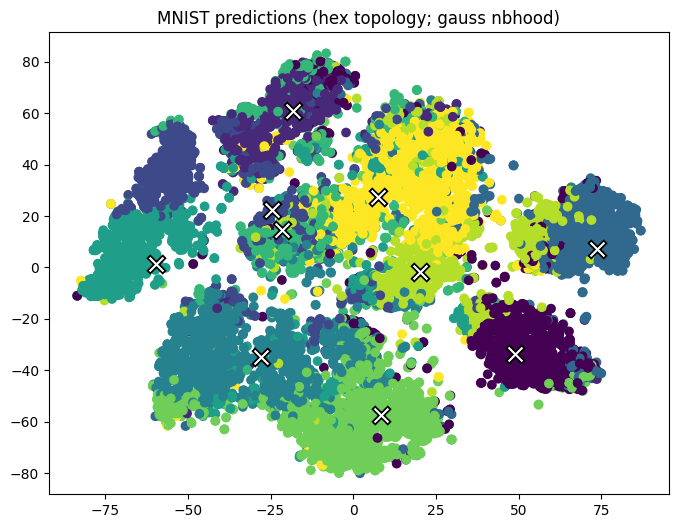

In [23]:
fig = plt.figure()
koh_mnist_hex_gauss.visualise_centroids(data=mnist_data, fig=fig)
plt.title('MNIST predictions (hex topology; gauss nbhood)')
plt.show()

### Square topology & mexican hat neighbourhood function

In [24]:
koh_mnist_sq_mex = KohonenNetwork(
    input_size=784, output_dim=(5, 2), hex_topology=False,
)

In [25]:
koh_mnist_sq_mex.train(
    data=mnist_data, epochs=20, init_lr=0.1, lr_decay_func=alpha_func, 
    neighbourhood_func=MexicanHat(nbhood_width_factor=0.1),
    verbosity_period=1, random_state=26,
)

Epoch 1 done!
   - mean abs delta = 6.104833493841126
   - max abs delta = 53.17317774671035
Epoch 2 done!
   - mean abs delta = 5.1089817842606315
   - max abs delta = 46.14670831983394
Epoch 3 done!
   - mean abs delta = 4.148110650153371
   - max abs delta = 43.89610679767795
Epoch 4 done!
   - mean abs delta = 3.3140700293769774
   - max abs delta = 41.75526840697708
Epoch 5 done!
   - mean abs delta = 2.6504973519563446
   - max abs delta = 39.71883993664166
Epoch 6 done!
   - mean abs delta = 2.1129263057130254
   - max abs delta = 37.78172925476761
Epoch 7 done!
   - mean abs delta = 1.6912562405278477
   - max abs delta = 35.939092575654385
Epoch 8 done!
   - mean abs delta = 1.3698315316886316
   - max abs delta = 34.18632234781761
Epoch 9 done!
   - mean abs delta = 1.116824897705571
   - max abs delta = 32.51903573271044
Epoch 10 done!
   - mean abs delta = 0.9190880603648031
   - max abs delta = 30.93306364534431
Epoch 11 done!
   - mean abs delta = 0.7634929262561093
   - 

In [26]:
pred = koh_mnist_sq_mex.predict(mnist_data)
print_scores(mnist_labels, pred)

Adjusted Rand score: 0.399
Adjusted Mutual Information score: 0.513


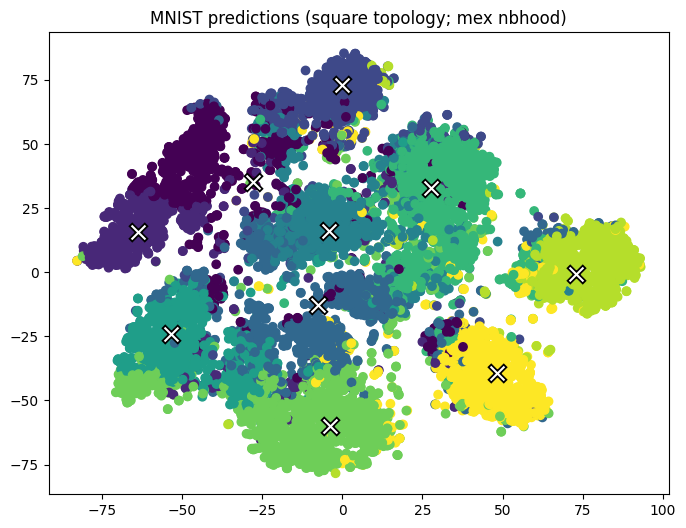

In [27]:
fig = plt.figure()
koh_mnist_sq_mex.visualise_centroids(data=mnist_data, fig=fig)
plt.title('MNIST predictions (square topology; mex nbhood)')
plt.show()

### Hex topology & mexican hat neighbourhood function

In [28]:
koh_mnist_hex_mex = KohonenNetwork(
    input_size=784, output_dim=(5, 2), hex_topology=True,
)

In [29]:
koh_mnist_hex_mex.train(
    data=mnist_data, epochs=20, init_lr=0.1, lr_decay_func=alpha_func, 
    neighbourhood_func=MexicanHat(nbhood_width_factor=0.1),
    verbosity_period=1, random_state=28,
)

Epoch 1 done!
   - mean abs delta = 4.6111088722565166
   - max abs delta = 53.55409353245107
Epoch 2 done!
   - mean abs delta = 3.550057674635284
   - max abs delta = 46.43939197977748
Epoch 3 done!
   - mean abs delta = 2.640830596309624
   - max abs delta = 43.89955344695146
Epoch 4 done!
   - mean abs delta = 1.954046474383004
   - max abs delta = 41.75526854390655
Epoch 5 done!
   - mean abs delta = 1.45086372475442
   - max abs delta = 39.71883993666042
Epoch 6 done!
   - mean abs delta = 1.095272271478559
   - max abs delta = 37.78172925476761
Epoch 7 done!
   - mean abs delta = 0.8425366669139329
   - max abs delta = 35.939092575654385
Epoch 8 done!
   - mean abs delta = 0.663132706952244
   - max abs delta = 34.18632234781761
Epoch 9 done!
   - mean abs delta = 0.5345603852368787
   - max abs delta = 32.51903573271044
Epoch 10 done!
   - mean abs delta = 0.4444469086536305
   - max abs delta = 30.93306364534431
Epoch 11 done!
   - mean abs delta = 0.3871379405453109
   - max 

In [30]:
pred = koh_mnist_hex_mex.predict(mnist_data)
print_scores(mnist_labels, pred)

Adjusted Rand score: 0.338
Adjusted Mutual Information score: 0.451


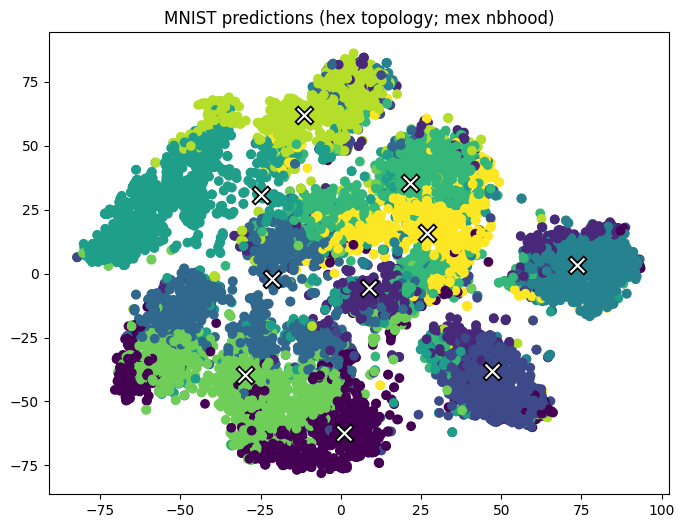

In [31]:
fig = plt.figure()
koh_mnist_hex_mex.visualise_centroids(data=mnist_data, fig=fig)
plt.title('MNIST predictions (hex topology; mex nbhood)')
plt.show()

### Side by side

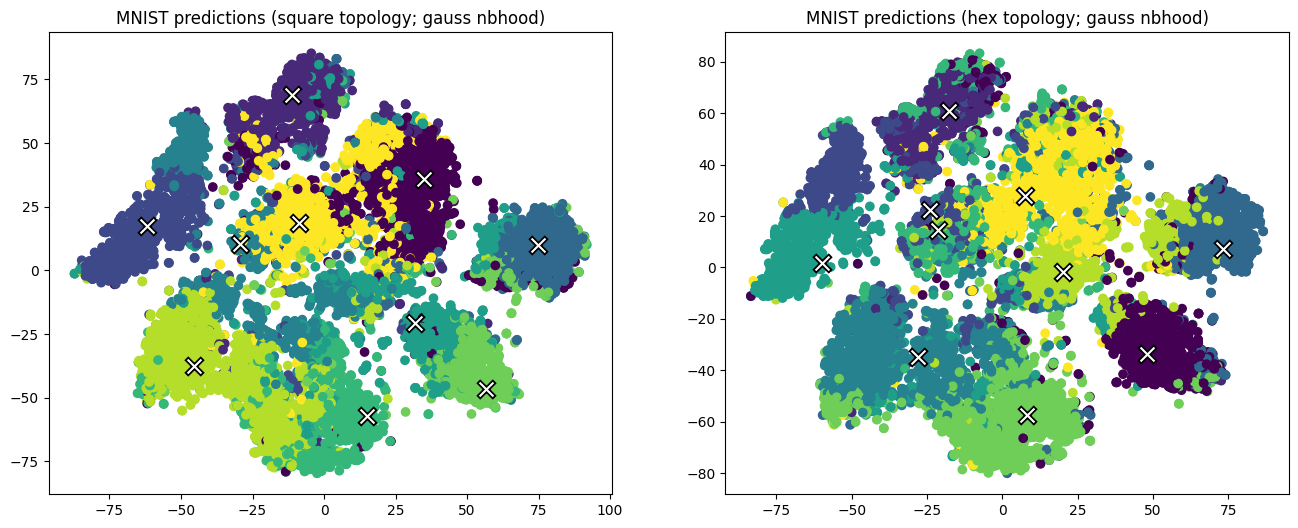

In [50]:
fig = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
koh_mnist_sq_gauss.visualise_centroids(data=mnist_data, fig=fig)
plt.title('MNIST predictions (square topology; gauss nbhood)')

plt.subplot(1, 2, 2)
koh_mnist_hex_gauss.visualise_centroids(data=mnist_data, fig=fig)
plt.title('MNIST predictions (hex topology; gauss nbhood)')

plt.show()

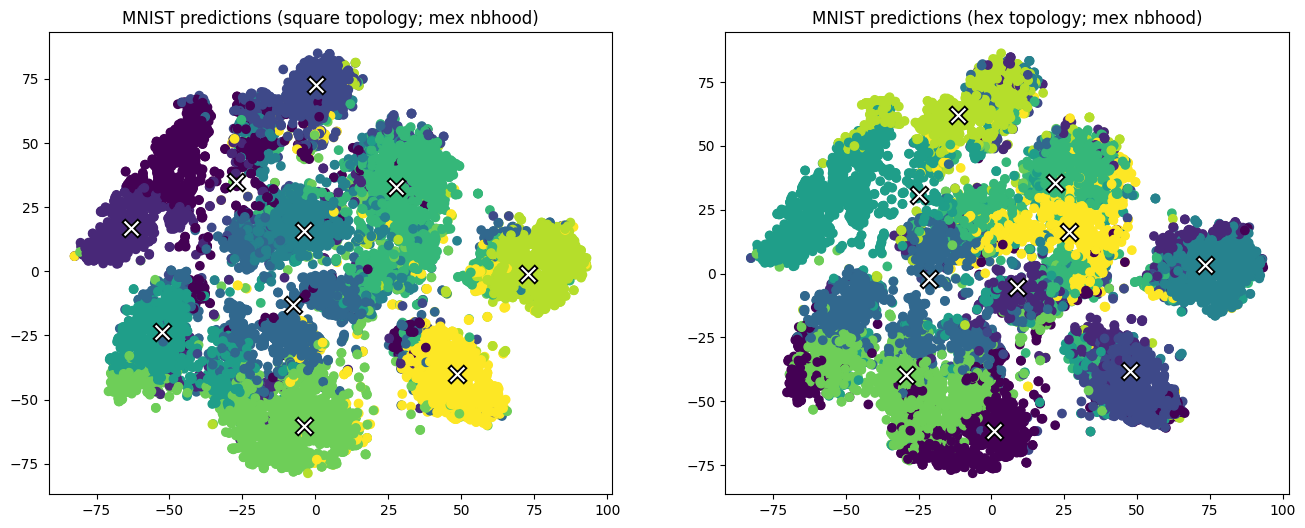

In [51]:
fig = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
koh_mnist_sq_mex.visualise_centroids(data=mnist_data, fig=fig)
plt.title('MNIST predictions (square topology; mex nbhood)')

plt.subplot(1, 2, 2)
koh_mnist_hex_mex.visualise_centroids(data=mnist_data, fig=fig)
plt.title('MNIST predictions (hex topology; mex nbhood)')

plt.show()

## smartphones

### Square topology & gaussian neighbourhood function

In [32]:
koh_smartph_sq_gauss = KohonenNetwork(
    input_size=561, output_dim=(3, 2), hex_topology=False,
)

In [33]:
koh_smartph_sq_gauss.train(
    data=smartphones_data, epochs=20, init_lr=0.4, lr_decay_func=alpha_func, 
    neighbourhood_func=GaussFunction(nbhood_width_factor=0.3),
    verbosity_period=1, random_state=29,
)

Epoch 1 done!
   - mean abs delta = 0.07716268562134139
   - max abs delta = 0.7982917566752256
Epoch 2 done!
   - mean abs delta = 0.04269382547481799
   - max abs delta = 0.716850375325942
Epoch 3 done!
   - mean abs delta = 0.021912356263042353
   - max abs delta = 0.6850628759665517
Epoch 4 done!
   - mean abs delta = 0.012787198931264393
   - max abs delta = 0.6473280963651271
Epoch 5 done!
   - mean abs delta = 0.008650616897834083
   - max abs delta = 0.6168564868634432
Epoch 6 done!
   - mean abs delta = 0.0066494930934182395
   - max abs delta = 0.5904950773537117
Epoch 7 done!
   - mean abs delta = 0.005637200478227682
   - max abs delta = 0.5576035820523806
Epoch 8 done!
   - mean abs delta = 0.005098388258573355
   - max abs delta = 0.532084720426045
Epoch 9 done!
   - mean abs delta = 0.004775878257000939
   - max abs delta = 0.5066179549078299
Epoch 10 done!
   - mean abs delta = 0.004517308130798661
   - max abs delta = 0.4843142945067278
Epoch 11 done!
   - mean abs del

In [34]:
pred = koh_smartph_sq_gauss.predict(smartphones_data)
print_scores(smartphones_labels, pred)

Adjusted Rand score: 0.455
Adjusted Mutual Information score: 0.586


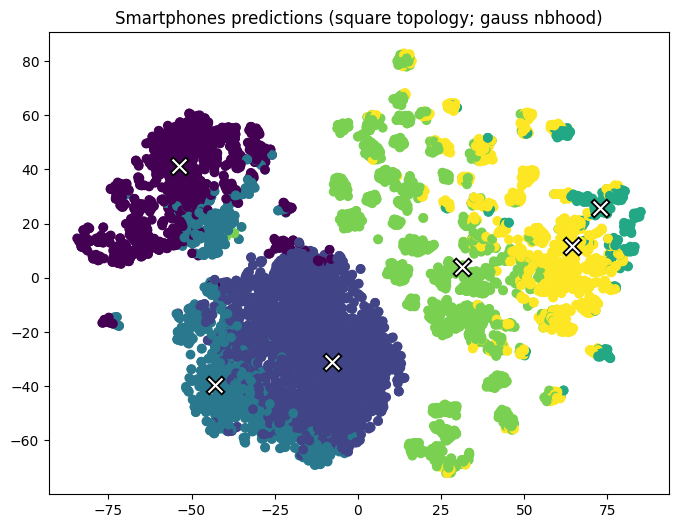

In [35]:
fig = plt.figure()
koh_smartph_sq_gauss.visualise_centroids(data=smartphones_data, fig=fig)
plt.title('Smartphones predictions (square topology; gauss nbhood)')
plt.show()

### Hex topology & gaussian neighbourhood function

In [36]:
koh_smartph_hex_gauss = KohonenNetwork(
    input_size=561, output_dim=(3, 2), hex_topology=True,
)

In [37]:
koh_smartph_hex_gauss.train(
    data=smartphones_data, epochs=20, init_lr=0.4, lr_decay_func=alpha_func, 
    neighbourhood_func=GaussFunction(nbhood_width_factor=0.3),
    verbosity_period=1, random_state=4,
)

Epoch 1 done!
   - mean abs delta = 0.04907444951652519
   - max abs delta = 0.7946668737276241
Epoch 2 done!
   - mean abs delta = 0.019022070176391907
   - max abs delta = 0.7184679155590068
Epoch 3 done!
   - mean abs delta = 0.009662810061958333
   - max abs delta = 0.6817744004450748
Epoch 4 done!
   - mean abs delta = 0.006778474049560337
   - max abs delta = 0.6515907383303428
Epoch 5 done!
   - mean abs delta = 0.005970068007517487
   - max abs delta = 0.6185391532798246
Epoch 6 done!
   - mean abs delta = 0.005609280698649657
   - max abs delta = 0.5902615322431964
Epoch 7 done!
   - mean abs delta = 0.00529903385997451
   - max abs delta = 0.5533622078533803
Epoch 8 done!
   - mean abs delta = 0.005016845297803136
   - max abs delta = 0.5327720462377317
Epoch 9 done!
   - mean abs delta = 0.004750328600499327
   - max abs delta = 0.5079362537382766
Epoch 10 done!
   - mean abs delta = 0.004492777753070522
   - max abs delta = 0.4834434910950051
Epoch 11 done!
   - mean abs de

In [38]:
pred = koh_smartph_hex_gauss.predict(smartphones_data)
print_scores(smartphones_labels, pred)

Adjusted Rand score: 0.486
Adjusted Mutual Information score: 0.602


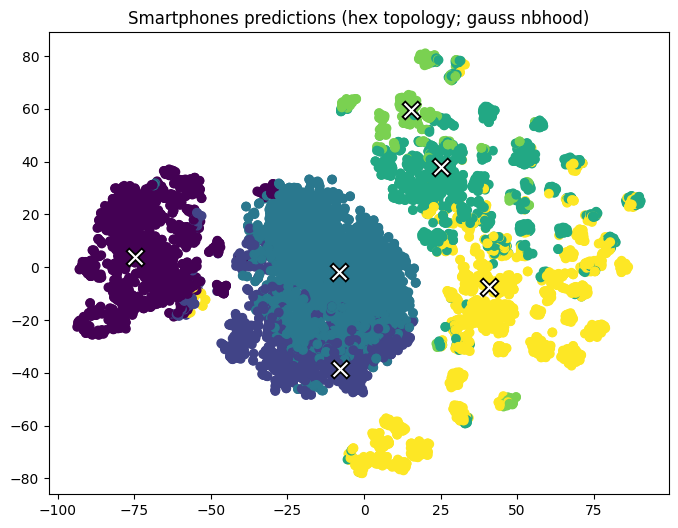

In [39]:
fig = plt.figure()
koh_smartph_hex_gauss.visualise_centroids(data=smartphones_data, fig=fig)
plt.title('Smartphones predictions (hex topology; gauss nbhood)')
plt.show()

### Square topology & mexican hat neighbourhood function

In [42]:
koh_smartph_sq_mex = KohonenNetwork(
    input_size=561, output_dim=(3, 2), hex_topology=False,
)

In [43]:
koh_smartph_sq_mex.train(
    data=smartphones_data, epochs=20, init_lr=0.1, lr_decay_func=alpha_func, 
    neighbourhood_func=MexicanHat(nbhood_width_factor=0.1),
    verbosity_period=1, random_state=33,
)

Epoch 1 done!
   - mean abs delta = 0.04291899282512635
   - max abs delta = 0.39935744016201413
Epoch 2 done!
   - mean abs delta = 0.038141566237104005
   - max abs delta = 0.36097829440638646
Epoch 3 done!
   - mean abs delta = 0.03239842503481219
   - max abs delta = 0.3423333699047247
Epoch 4 done!
   - mean abs delta = 0.026581142370540288
   - max abs delta = 0.3260854112764372
Epoch 5 done!
   - mean abs delta = 0.020992301940814393
   - max abs delta = 0.31023095756737484
Epoch 6 done!
   - mean abs delta = 0.016235001492723913
   - max abs delta = 0.2922976459528751
Epoch 7 done!
   - mean abs delta = 0.012525654912788738
   - max abs delta = 0.28009878759404466
Epoch 8 done!
   - mean abs delta = 0.00969316847117973
   - max abs delta = 0.2638551974611323
Epoch 9 done!
   - mean abs delta = 0.0076268668323351335
   - max abs delta = 0.250779265013116
Epoch 10 done!
   - mean abs delta = 0.006057926908104396
   - max abs delta = 0.2389641083344678
Epoch 11 done!
   - mean abs

In [44]:
pred = koh_smartph_sq_mex.predict(smartphones_data)
print_scores(smartphones_labels, pred)

Adjusted Rand score: 0.438
Adjusted Mutual Information score: 0.601


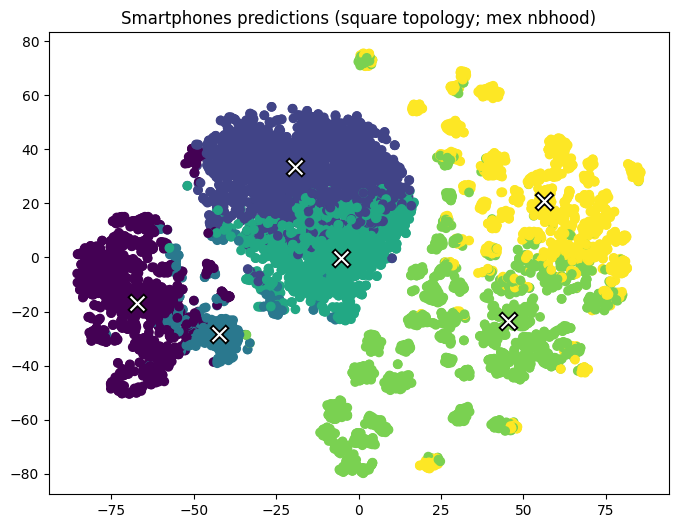

In [45]:
fig = plt.figure()
koh_smartph_sq_mex.visualise_centroids(data=smartphones_data, fig=fig)
plt.title('Smartphones predictions (square topology; mex nbhood)')
plt.show()

### Hex topology & mexican hat neighbourhood function

In [46]:
koh_smartph_hex_mex = KohonenNetwork(
    input_size=561, output_dim=(3, 2), hex_topology=True,
)

In [47]:
koh_smartph_hex_mex.train(
    data=smartphones_data, epochs=20, init_lr=0.1, lr_decay_func=alpha_func, 
    neighbourhood_func=MexicanHat(nbhood_width_factor=0.1),
    verbosity_period=1, random_state=24,
)

Epoch 1 done!
   - mean abs delta = 0.0350666904449578
   - max abs delta = 0.39247334102737463
Epoch 2 done!
   - mean abs delta = 0.026573027104500106
   - max abs delta = 0.3594497850215043
Epoch 3 done!
   - mean abs delta = 0.01865502548309635
   - max abs delta = 0.34041662325160815
Epoch 4 done!
   - mean abs delta = 0.013120346755961802
   - max abs delta = 0.32363318564790344
Epoch 5 done!
   - mean abs delta = 0.00962043629703867
   - max abs delta = 0.30783469896921256
Epoch 6 done!
   - mean abs delta = 0.007168886096107061
   - max abs delta = 0.2926504404583393
Epoch 7 done!
   - mean abs delta = 0.005381886322375779
   - max abs delta = 0.2779273519316569
Epoch 8 done!
   - mean abs delta = 0.00415638155099918
   - max abs delta = 0.2660939077399393
Epoch 9 done!
   - mean abs delta = 0.003335019018695505
   - max abs delta = 0.25148037194253736
Epoch 10 done!
   - mean abs delta = 0.002772677767264005
   - max abs delta = 0.2389190288729214
Epoch 11 done!
   - mean abs 

In [48]:
pred = koh_smartph_hex_mex.predict(smartphones_data)
print_scores(smartphones_labels, pred)

Adjusted Rand score: 0.475
Adjusted Mutual Information score: 0.602


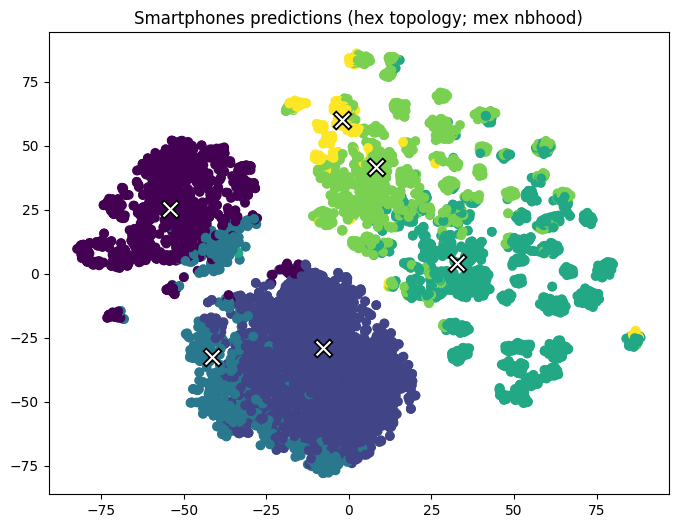

In [49]:
fig = plt.figure()
koh_smartph_hex_mex.visualise_centroids(data=smartphones_data, fig=fig)
plt.title('Smartphones predictions (hex topology; mex nbhood)')
plt.show()

### Side by side

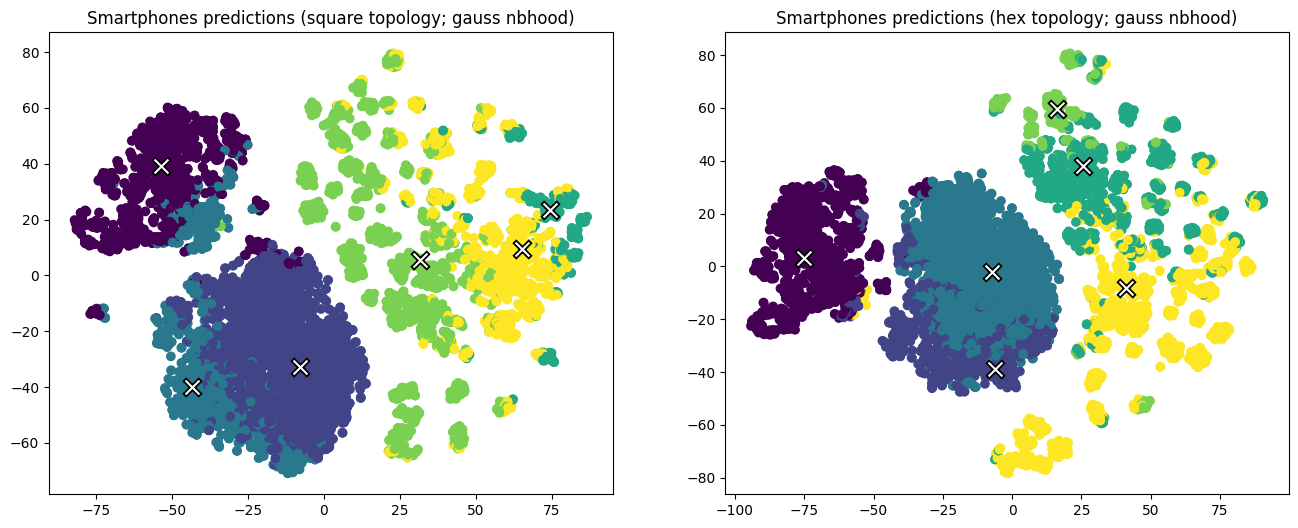

In [52]:
fig = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
koh_smartph_sq_gauss.visualise_centroids(data=smartphones_data, fig=fig)
plt.title('Smartphones predictions (square topology; gauss nbhood)')

plt.subplot(1, 2, 2)
koh_smartph_hex_gauss.visualise_centroids(data=smartphones_data, fig=fig)
plt.title('Smartphones predictions (hex topology; gauss nbhood)')

plt.show()

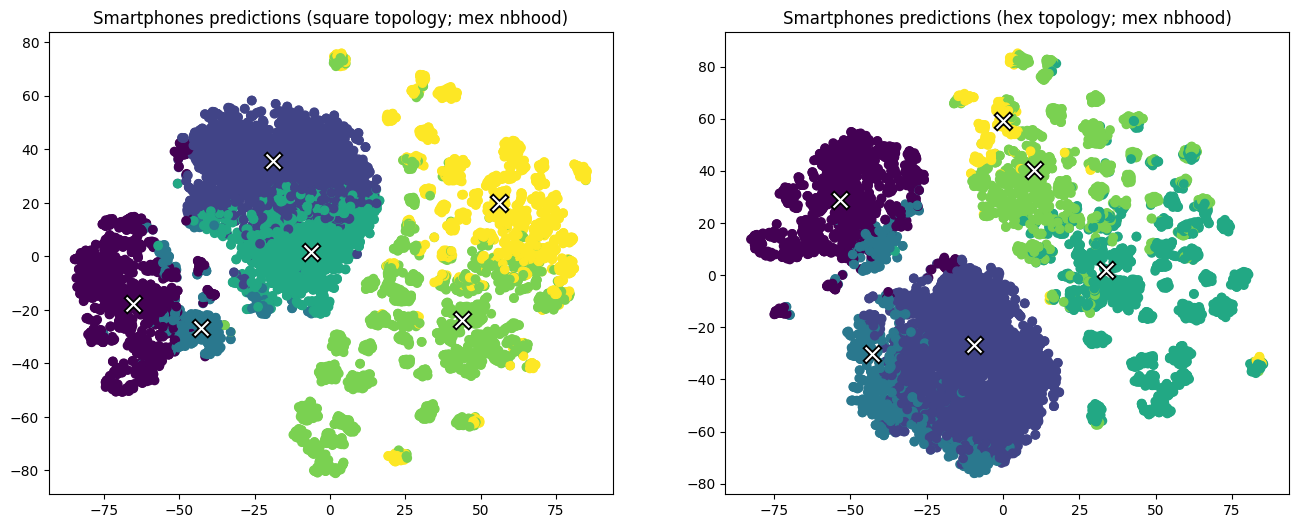

In [53]:
fig = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
koh_smartph_sq_mex.visualise_centroids(data=smartphones_data, fig=fig)
plt.title('Smartphones predictions (square topology; mex nbhood)')

plt.subplot(1, 2, 2)
koh_smartph_hex_mex.visualise_centroids(data=smartphones_data, fig=fig)
plt.title('Smartphones predictions (hex topology; mex nbhood)')

plt.show()